In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("dataset/2010-2011.csv", low_memory=False)

In [9]:
df.columns

Index(['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category',
       'date', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00',
       '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
       '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
       '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
       '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
       '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00'],
      dtype='object')

In [23]:
df.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.495,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,0.262,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088


In [24]:
times_columns = df.columns[5:]
times_columns

Index(['0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30',
       '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00',
       '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00',
       '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00',
       '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00',
       '21:30', '22:00', '22:30', '23:00', '23:30', '0:00'],
      dtype='object')

In [25]:
melted_df = pd.melt(df, id_vars=['Customer', 'Generator Capacity', 'Postcode','Consumption Category','date'], value_vars=times_columns, var_name='time', value_name='value')
melted_df['datetime'] = pd.to_datetime(melted_df['date'] + ' ' + melted_df['time'])

C:\Users\Hesam-PC\AppData\Local\Temp\ipykernel_2868\725171762.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['datetime'] = pd.to_datetime(melted_df['date'] + ' ' + melted_df['time'])


In [26]:
melted_df['label'] = melted_df.groupby('datetime').ngroup() + 1

In [32]:
melted_df.shape

(12947280, 6)

In [28]:
melted_df.drop(columns=['Postcode', 'date', 'time'], inplace=True)

In [30]:
pivoted_df = melted_df.pivot(index=['Customer', 'Generator Capacity', 'datetime', 'label'], columns='Consumption Category', values='value')

In [33]:
pivoted_df = pivoted_df.reset_index()

In [38]:
pivoted_df = pivoted_df.rename_axis(None, axis=1)

In [39]:
pivoted_df

,Customer,Generator Capacity,datetime,label,CL,GC,GG
0,1,3.78,2010-07-01 00:00:00,1,1.075,0.125,0.0
1,1,3.78,2010-07-01 00:30:00,2,1.250,0.303,0.0
2,1,3.78,2010-07-01 01:00:00,3,1.244,0.471,0.0
3,1,3.78,2010-07-01 01:30:00,4,1.256,0.083,0.0
4,1,3.78,2010-07-01 02:00:00,5,0.744,0.121,0.0
...,...,...,...,...,...,...,...
5255995,300,3.36,2011-06-30 21:30:00,17516,0.000,0.863,0.0
5255996,300,3.36,2011-06-30 22:00:00,17517,0.000,0.789,0.0
5255997,300,3.36,2011-06-30 22:30:00,17518,0.000,0.280,0.0
5255998,300,3.36,2011-06-30 23:00:00,17519,0.000,0.224,0.0


In [40]:
pivoted_df.to_csv("dataset/wind_engineered_all.csv", index=False)

In [113]:
df[df["Customer"]==300]
# 1 -> lat=-33.7085861, long=151.1228434
# 10 -> lat=-33.2075583, long=151.5428026
# 300 -> lat=-33.7473073, long=151.2248157


,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
268640,300,3.36,2086,GC,1-Jul-10,0.279,0.924,0.803,0.066,0.089,...,1.414,1.347,0.894,0.844,0.767,0.705,0.657,0.105,0.133,0.097
268641,300,3.36,2086,CL,1-Jul-10,2.487,2.392,1.285,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.414
268642,300,3.36,2086,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
268643,300,3.36,2086,GC,2-Jul-10,0.303,0.928,0.803,0.094,0.075,...,1.339,1.141,2.241,2.395,1.013,0.966,0.920,0.981,0.942,0.227
268644,300,3.36,2086,CL,2-Jul-10,2.474,2.375,0.386,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269730,300,3.36,2086,CL,29-Jun-11,2.136,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.490
269731,300,3.36,2086,GG,29-Jun-11,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
269732,300,3.36,2086,GC,30-Jun-11,1.306,0.851,0.113,0.151,0.104,...,0.948,0.917,0.872,0.832,0.863,0.789,0.280,0.224,0.259,0.774
269733,300,3.36,2086,CL,30-Jun-11,0.904,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.528


In [114]:
filtered_df = pivoted_df[(pivoted_df["Customer"]==300) &(pivoted_df["label"]<=48)]
# filtered_df = pivoted_df[(pivoted_df["Customer"]==10)]

In [73]:
filtered_df.columns

Index(['Customer', 'Generator Capacity', 'datetime', 'label', 'CL', 'GC',
       'GG'],
      dtype='object')

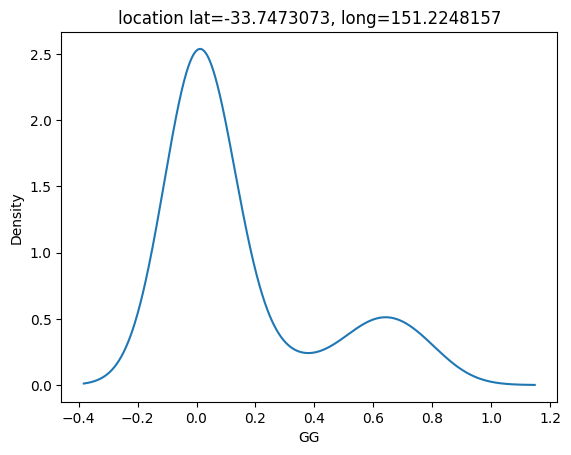

In [117]:
# 1 -> lat=-33.7085861, long=151.1228434
# 10 -> lat=-33.2075583, long=151.5428026
# 300 -> lat=-33.7473073, long=151.2248157

ax = filtered_df['GG'].plot(kind='density')
# Set the title of the plot
ax.set_title('location lat=-33.7473073, long=151.2248157')

# Set the title of the x-axis and y-axis
ax.set_xlabel('GG')
ax.set_ylabel('Density')

plt.savefig('Customer300-GG.png', dpi=300)
# Show the plot
plt.show()

In [83]:
Gen_df = pd.DataFrame(pivoted_df['Generator Capacity'].unique(), columns=['Generator Capacity'])

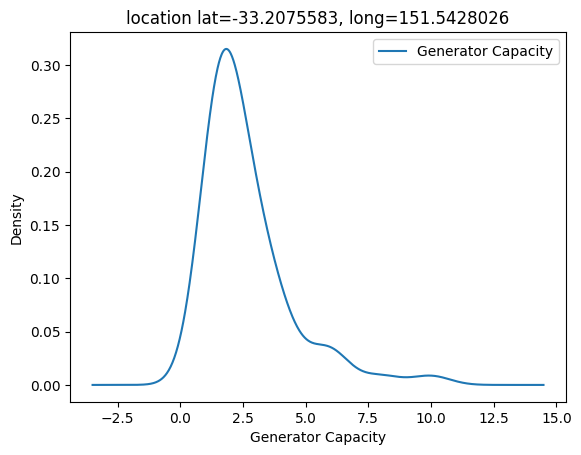

In [84]:
ax = Gen_df.plot(kind='density')
# Set the title of the plot
ax.set_title('location lat=-33.2075583, long=151.5428026')

# Set the title of the x-axis and y-axis
ax.set_xlabel('Generator Capacity')
ax.set_ylabel('Density')

plt.savefig('Generator Capacity.png', dpi=300)
# Show the plot
plt.show()

In [96]:
cus1_df = pivoted_df[(pivoted_df["Customer"]==1) &(pivoted_df["label"]<=48)]
cus2_df = pivoted_df[(pivoted_df["Customer"]==10) &(pivoted_df["label"]<=48)]
cus3_df = pivoted_df[(pivoted_df["Customer"]==300) &(pivoted_df["label"]<=48)]
cus3 = pivoted_df[(pivoted_df["Customer"]==300)]

In [90]:
cus3_df.columns

Index(['Customer', 'Generator Capacity', 'datetime', 'label', 'CL', 'GC',
       'GG'],
      dtype='object')

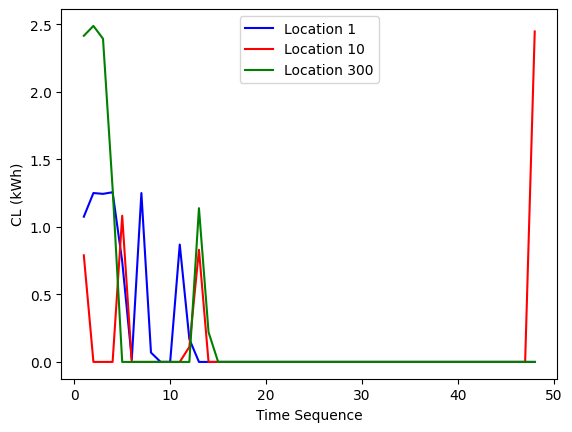

In [123]:
# Create a line chart of all three datasets
plt.plot(cus1_df['label'], cus1_df['CL'], color='blue', label='Location 1')
plt.plot(cus2_df['label'], cus2_df['CL'], color='red', label='Location 10')
plt.plot(cus3_df['label'], cus3_df['CL'], color='green', label='Location 300')

# Set the title of the plot
# plt.title('Line Chart of Three Datasets')

# Set the title of the x-axis and y-axis
plt.xlabel('Time Sequence')
plt.ylabel('CL (kWh)')

# Add a legend
plt.legend()

plt.savefig('Locations-CL.png', dpi=300)
# Show the plot
plt.show()

In [97]:
import seaborn as sns

In [110]:
cus3.head()

,time sequence,Cl,GC,GG
5238480,1,2.414,0.097,0.0
5238481,2,2.487,0.279,0.0
5238482,3,2.392,0.924,0.0
5238483,4,1.285,0.803,0.0
5238484,5,0.000,0.066,0.0


In [109]:
cus3.columns=['time sequence','Cl','GC','GG']


In [107]:
cus3.drop(columns=['Customer','Generator Capacity', 'datetime'], inplace=True)

C:\Users\Hesam-PC\AppData\Local\Temp\ipykernel_2868\149030735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus3.drop(columns=['Customer','Generator Capacity', 'datetime'], inplace=True)


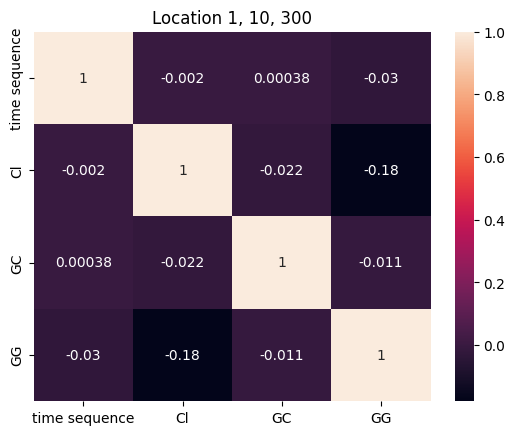

In [120]:
# Compute the correlation matrix
corr_matrix = cus3.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

# 1 -> lat=-33.7085861, long=151.1228434
# 10 -> lat=-33.2075583, long=151.5428026
# 300 -> lat=-33.7473073, long=151.2248157
# Set the title of the plot
plt.title('Location 1, 10, 300')
plt.savefig('Correlation-300.png', dpi=300)
# Show the plot
plt.show()

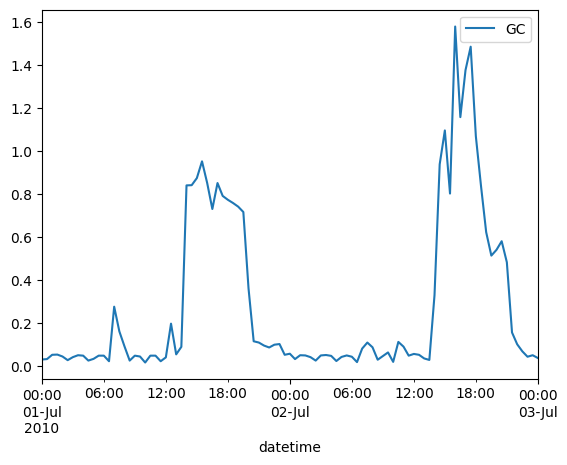

In [88]:
# Select the rows between two datetime
start_time = '2010-07-01 00:00:00'
end_time = '2010-07-03 00:00:00'
mask = (filtered_df['datetime'] >= start_time) & (filtered_df['datetime'] <= end_time)
subset_df = filtered_df.loc[mask]

# Create a line chart of the selected values
subset_df.plot(x='datetime', y='GC', kind='line')

# Show the plot
plt.show()

In [43]:
filtered_df = melted_df[melted_df["Customer"]<=5]

In [44]:
filtered_df.to_csv("dataset/wind.csv", index=False)

In [2]:
df = pd.read_csv("dataset/filtered_wind.csv", low_memory=False)

In [124]:
filtered_df.head()

,Customer,Generator Capacity,datetime,label,CL,GC,GG
5238480,300,3.36,2010-07-01 00:00:00,1,2.414,0.097,0.0
5238481,300,3.36,2010-07-01 00:30:00,2,2.487,0.279,0.0
5238482,300,3.36,2010-07-01 01:00:00,3,2.392,0.924,0.0
5238483,300,3.36,2010-07-01 01:30:00,4,1.285,0.803,0.0
5238484,300,3.36,2010-07-01 02:00:00,5,0.000,0.066,0.0


In [4]:
df.shape

(262800, 5)